In [3]:
import sys
sys.path.append("..")

In [4]:
from utils.draw_psd import draw_psd
from utils.feature_extraction import featutre_extraction
from utils.file_generator import eeg_file_generator
from utils.label_container import LabelsContainer
from utils.raw_eeg import RawEEG

import mne

The following is an example of loading an individual recording, or session, extracting relevant channels from that recording, displaying it, showing its spectral power, filtering, and displaying it again after filtering. The channels of interest are selected based on research, identifying those channels or regions of the brain that exhibit the strongest correlation between what the user feels and observes and their neural activity.

In [7]:
channels_of_interest = ["FP1", "FP2", "F3", "F4", "C3", "C4", "O1", "O2", "PZ"]
raw_eeg = mne.io.read_raw_cnt(eeg_file_generator("../data/raw_eeg_cnt_files")[0])
eeg = RawEEG(raw_eeg, channels_of_interest)

eeg.raw_eeg_data.shape

(9, 3383280)

Drawing/plotting all the selected channels.

c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


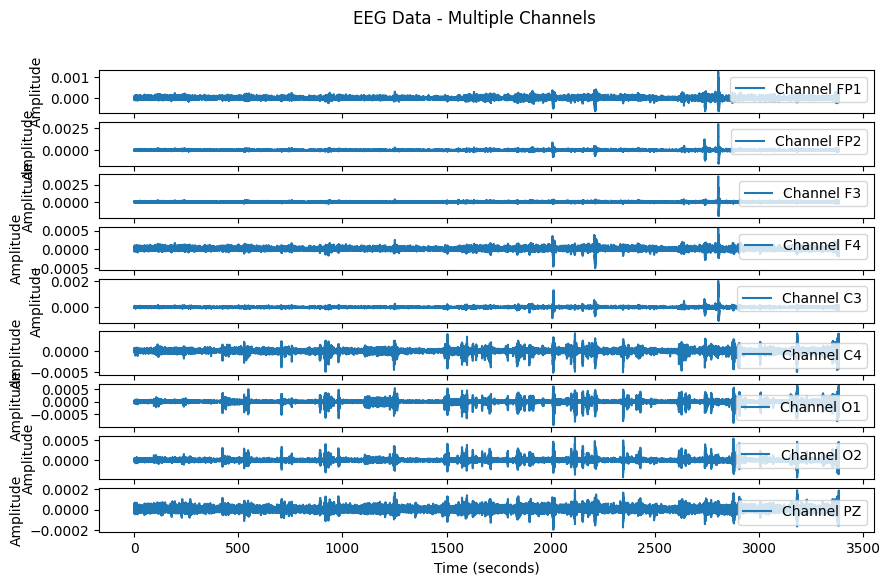

In [4]:
eeg.plot_raw_eeg()

Drawing/plotting one channel, '01', representing the occipital part of the brain responsible for processing visual sensations.

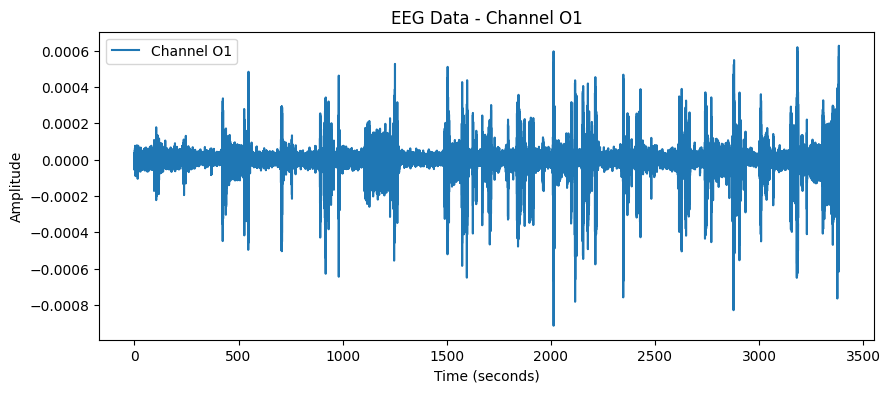

In [5]:
eeg.plot_single_channel("O1")

Displaying the onsets and offsets of each segment and the classes to which these segments belong in EEG signals.

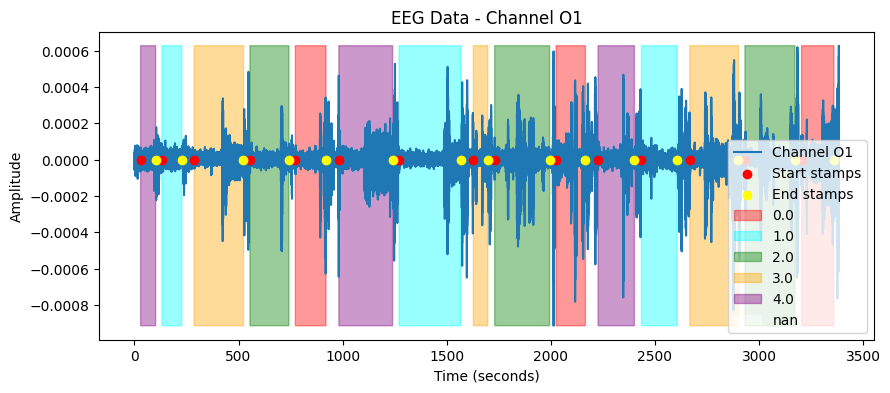

In [6]:
labels_container = LabelsContainer(1, "../data/session_time_stamps.json")
eeg.plot_single_channel("O1", labels_container.session['start'], labels_container.session['end'], labels_container.create_labels_vector(eeg.t))

Drawing the spectral power density. Drawing the spectral power density provides a visual representation of the distribution of signal power across different frequencies, offering insights into the frequency composition of a signal, which is crucial for understanding the underlying dynamics of the system being analyzed.

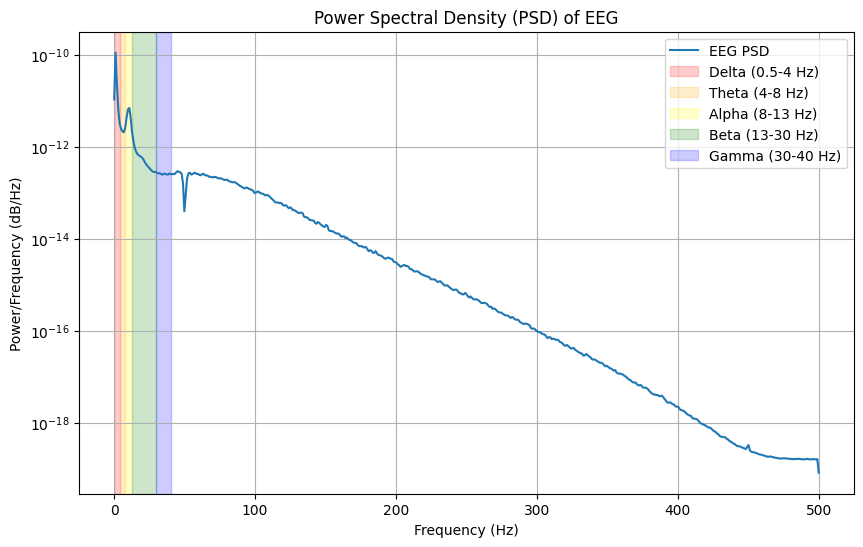

In [7]:
draw_psd(eeg.get_single_channel("O1"), 1000)

Amplitude before after filtering.

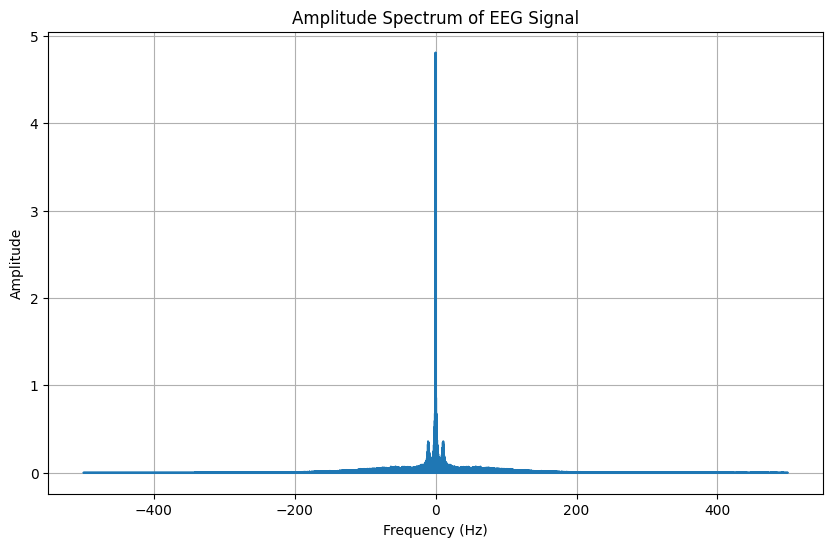

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fft_result = np.fft.fft(eeg.get_single_channel("O2"))
fft_freq = np.fft.fftfreq(len(eeg.get_single_channel("O2")), 1/1000)
amplitude_spectrum = np.abs(fft_result)
plt.figure(figsize=(10, 6))
plt.plot(fft_freq, amplitude_spectrum)
plt.title('Amplitude Spectrum of EEG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Filtering raw EEG signals in the range of 8 to 30 Hertz, the wakeful state range where significant components related to emotions are prominently present.

In [9]:
eeg.filter_data()

Amplitude spectrum after filtering.

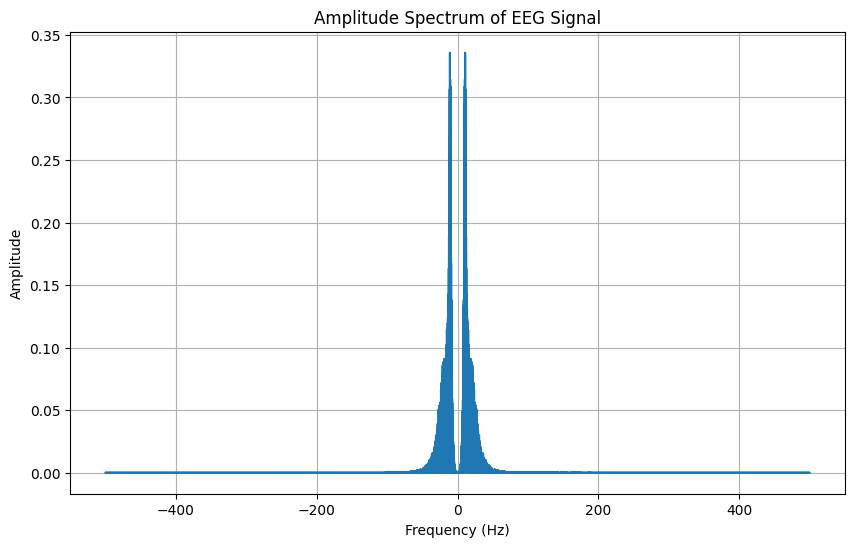

In [10]:
fft_result = np.fft.fft(eeg.get_single_channel("O2"))
fft_freq = np.fft.fftfreq(len(eeg.get_single_channel("O2")), 1/1000)
amplitude_spectrum = np.abs(fft_result)
plt.figure(figsize=(10, 6))
plt.plot(fft_freq, amplitude_spectrum)
plt.title('Amplitude Spectrum of EEG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Drawing Spectral Density Power and Raw EEG signals after filtration. 

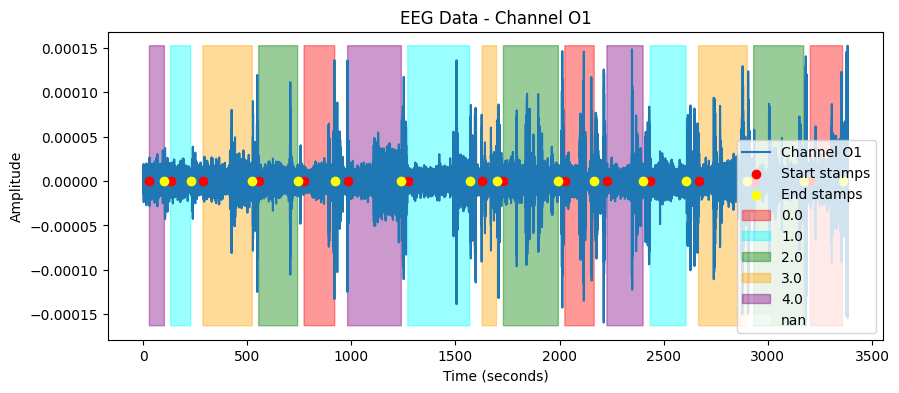

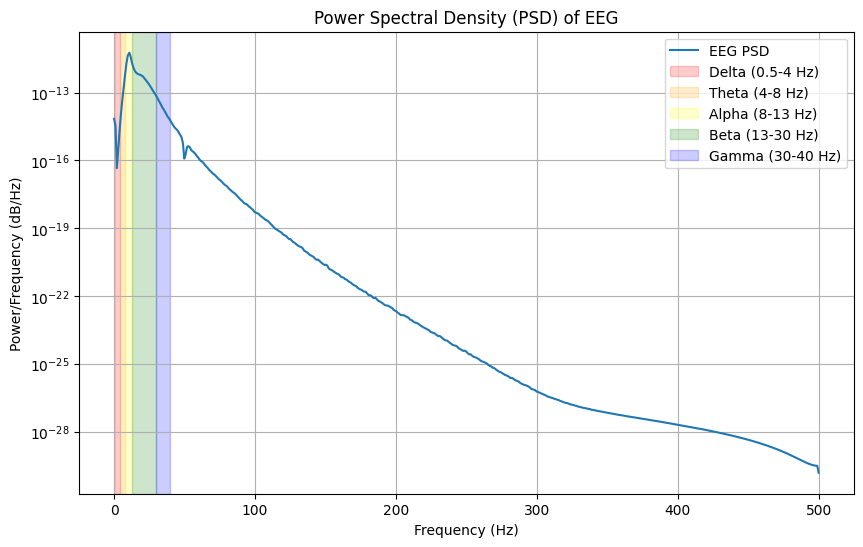

In [11]:
eeg.plot_single_channel("O1", labels_container.session['start'], labels_container.session['end'], labels_container.create_labels_vector(eeg.t))
draw_psd(eeg.get_single_channel("O1"), 1000)

The calculation of the spectrogram of an EEG signal and its visualization.

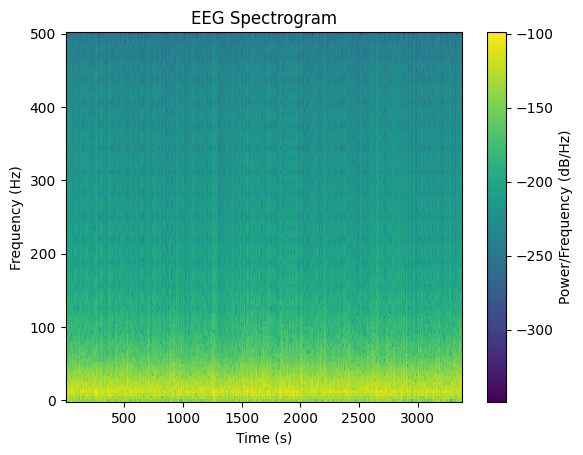

In [5]:
from scipy.signal import spectrogram

eeg.filter_data()
frequencies, times, Sxx = spectrogram(eeg.get_single_channel('O1'), 1000)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))  # Using log scale for better visualization
plt.title('EEG Spectrogram')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.show()

In [8]:
labels_container = LabelsContainer(1, "../data/session_time_stamps.json")
labels = labels_container.create_labels_vector(eeg.t)
feature_matrix = featutre_extraction(eeg.raw_eeg_data, labels, 1000, eeg.t)
feature_matrix.shape

c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 2000 is greater than input length  = 1000, using nperseg = 1000
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 2000 is greater than input length  = 280, using nperseg = 280
  warnings.warn('nperseg = {0:d} is greater than input length '


(3384, 47)

In [130]:
import numpy as np

channels_of_interest = ["FP1", "FP2", "F3", "F4", "C3", "C4", "O1", "O2"]
counter = 0

for eeg_file in eeg_file_generator("../data/raw_eeg_cnt_files/"):
    counter += 1
    raw_eeg = mne.io.read_raw_cnt(eeg_file)
    eeg_file = eeg_file.split("/")[-1]
    print(eeg_file)
    session_number = int(eeg_file.split("_")[1])
    eeg = RawEEG(raw_eeg, channels_of_interest)
    labels_container = LabelsContainer(session_number, "../data/session_time_stamps.json")
    labels = labels_container.create_labels_vector(eeg.t)
    eeg.filter_data()
    features = featutre_extraction(eeg.raw_eeg_data, labels, 2000, eeg.t)
    file_name = eeg_file.split('.')[0]
    print(f"_____Number:{counter}_____Name:{file_name}_____Done_____")
    np.save(f"../data/eeg_features_2000/{file_name}.npy", features)

10_1_20180507.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 2000, using nperseg = 2000
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1280, using nperseg = 1280
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:1_____Name:10_1_20180507_____Done_____
10_2_20180524.cnt
_____Number:2_____Name:10_2_20180524_____Done_____
10_3_20180626.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)
c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1160, using nperseg = 1160
  warnings.warn('nperseg = {0:d} is greater than input length '


_____Number:3_____Name:10_3_20180626_____Done_____
11_1_20180510.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 720, using nperseg = 720
  warnings.warn('nperseg = {0:d} is greater than input length '


_____Number:4_____Name:11_1_20180510_____Done_____
11_2_20180508.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1040, using nperseg = 1040
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:5_____Name:11_2_20180508_____Done_____
11_3_20180522.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1640, using nperseg = 1640
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:6_____Name:11_3_20180522_____Done_____
12_1_20180515.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1600, using nperseg = 1600
  warnings.warn('nperseg = {0:d} is greater than input length '


_____Number:7_____Name:12_1_20180515_____Done_____
12_2_20180508.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1680, using nperseg = 1680
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:8_____Name:12_2_20180508_____Done_____
12_3_20180517.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1440, using nperseg = 1440
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:9_____Name:12_3_20180517_____Done_____
13_1_20180720.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 800, using nperseg = 800
  warnings.warn('nperseg = {0:d} is greater than input length '


_____Number:10_____Name:13_1_20180720_____Done_____
13_2_20180806.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1480, using nperseg = 1480
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:11_____Name:13_2_20180806_____Done_____
13_3_20180725.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 640, using nperseg = 640
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:12_____Name:13_3_20180725_____Done_____
14_1_20180420.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:13_____Name:14_1_20180420_____Done_____
14_2_20180423.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1360, using nperseg = 1360
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:14_____Name:14_2_20180423_____Done_____
14_3_20180427.cnt
_____Number:15_____Name:14_3_20180427_____Done_____
15_1_20180724.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)
c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 280, using nperseg = 280
  warnings.warn('nperseg = {0:d} is greater than input length '


_____Number:16_____Name:15_1_20180724_____Done_____
15_2_20180807.cnt
_____Number:17_____Name:15_2_20180807_____Done_____
15_3_20180730.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)
c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1720, using nperseg = 1720
  warnings.warn('nperseg = {0:d} is greater than input length '


_____Number:18_____Name:15_3_20180730_____Done_____
16_1_20180805.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 240, using nperseg = 240
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:19_____Name:16_1_20180805_____Done_____
16_2_20180815.cnt
_____Number:20_____Name:16_2_20180815_____Done_____
16_3_20180813.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:21_____Name:16_3_20180813_____Done_____
1_1_20180804.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 360, using nperseg = 360
  warnings.warn('nperseg = {0:d} is greater than input length '


_____Number:22_____Name:1_1_20180804_____Done_____
1_2_20180810.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 480, using nperseg = 480
  warnings.warn('nperseg = {0:d} is greater than input length '


_____Number:23_____Name:1_2_20180810_____Done_____
1_3_20180808.cnt
_____Number:24_____Name:1_3_20180808_____Done_____
2_1_20180416.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:25_____Name:2_1_20180416_____Done_____
2_2_20180419.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:26_____Name:2_2_20180419_____Done_____
2_3_20180425.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)
c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1120, using nperseg = 1120
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:27_____Name:2_3_20180425_____Done_____
3_1_20180414.cnt
_____Number:28_____Name:3_1_20180414_____Done_____
3_2_20180419.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:29_____Name:3_2_20180419_____Done_____
3_3_20180424.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:30_____Name:3_3_20180424_____Done_____
4_1_20180414.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)
c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1800, using nperseg = 1800
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:31_____Name:4_1_20180414_____Done_____
4_2_20180417.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 880, using nperseg = 880
  warnings.warn('nperseg = {0:d} is greater than input length '


_____Number:32_____Name:4_2_20180417_____Done_____
4_3_20180501.cnt
_____Number:33_____Name:4_3_20180501_____Done_____
5_1_20180719.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)
c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1960, using nperseg = 1960
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:34_____Name:5_1_20180719_____Done_____
5_2_20180728.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 440, using nperseg = 440
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:35_____Name:5_2_20180728_____Done_____
5_3_20180723.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1920, using nperseg = 1920
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:36_____Name:5_3_20180723_____Done_____
6_1_20180713.cnt
_____Number:37_____Name:6_1_20180713_____Done_____
6_2_20180731.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:38_____Name:6_2_20180731_____Done_____
6_3_20180802.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 1520, using nperseg = 1520
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:39_____Name:6_3_20180802_____Done_____
7_1_20180411.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\stats\_entropy.py:133: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


_____Number:40_____Name:7_1_20180411_____Done_____
7_2_20180418.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:41_____Name:7_2_20180418_____Done_____
7_3_20180422.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)
c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 560, using nperseg = 560
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:42_____Name:7_3_20180422_____Done_____
8_1_20180717.cnt
_____Number:43_____Name:8_1_20180717_____Done_____
8_2_20180802.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 400, using nperseg = 400
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:44_____Name:8_2_20180802_____Done_____
8_3_20180726.cnt


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 40, using nperseg = 40
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:45_____Name:8_3_20180726_____Done_____
9_1_20180724.cnt
_____Number:46_____Name:9_1_20180724_____Done_____
9_2_20180804.cnt
_____Number:47_____Name:9_2_20180804_____Done_____
9_3_20180728.cnt


C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\340276034.py:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


_____Number:48_____Name:9_3_20180728_____Done_____


c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 4000 is greater than input length  = 960, using nperseg = 960
  warnings.warn('nperseg = {0:d} is greater than input length '


In [129]:
import json
from scipy.signal import spectrogram
import numpy as np

with open("../data/session_time_stamps.json", "r") as file:
    data = json.load(file)

channels_of_interest = ["FP1", "FP2", "F3", "F4", "C3", "C4", "O1", "O2"]

for eeg_file in eeg_file_generator("../data/raw_eeg_cnt_files"):
    raw_eeg = mne.io.read_raw_cnt(eeg_file)
    eeg = RawEEG(raw_eeg, channels_of_interest)
    session_number = eeg_file.split("\\")[-1].split("_")[1]
    eeg_date = eeg_file.split("\\")[-1].split("_")[2].split(".")[0]
    eeg.filter_data()
    spectrograms = []
    for start, end, label in zip(data[session_number]['start'], data[session_number]['end'], data[session_number]['labels']):
        for i in range(end - start):
            cutting_start = 2000*(start + i)
            cutting_end = 2000*(start + i + 1)
            signal = eeg.raw_eeg_data[:, cutting_start: cutting_end]
            frequencies, times, Sxx = spectrogram(signal, 1000)
            if Sxx.shape == (8, 129, 8):
                processed_spectrogram = np.concatenate(Sxx[:, :64, :], axis=1)
                np.save(f"../data/spectrograms/spectrogram_{label}_{i}_{eeg_date}", processed_spectrogram)
                print(eeg_file)
            else:
                continue

../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_20180507.cnt
../data/raw_eeg_cnt_files\10_1_2

c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 0, using nperseg = 0
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_20180524.cnt
../data/raw_eeg_cnt_files\10_2_2

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_20180626.cnt
../data/raw_eeg_cnt_files\10_3_2

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_20180522.cnt
../data/raw_eeg_cnt_files\11_3_2

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_20180515.cnt
../data/raw_eeg_cnt_files\12_1_2

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_20180517.cnt
../data/raw_eeg_cnt_files\12_3_2

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_20180720.cnt
../data/raw_eeg_cnt_files\13_1_2

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_20180725.cnt
../data/raw_eeg_cnt_files\13_3_2

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_20180420.cnt
../data/raw_eeg_cnt_files\14_1_2

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_20180423.cnt
../data/raw_eeg_cnt_files\14_2_2

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_20180427.cnt
../data/raw_eeg_cnt_files\14_3_2

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_20180724.cnt
../data/raw_eeg_cnt_files\15_1_2

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_20180730.cnt
../data/raw_eeg_cnt_files\15_3_2

c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg = 240
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_20180815.cnt
../data/raw_eeg_cnt_files\16_2_2

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_20180813.cnt
../data/raw_eeg_cnt_files\16_3_2

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw_eeg_cnt_files\2_1_20180416.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw_eeg_cnt_files\2_2_20180419.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw_eeg_cnt_files\2_3_20180425.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw_eeg_cnt_files\3_1_20180414.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw_eeg_cnt_files\3_2_20180419.cnt
../data/raw

c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw_eeg_cnt_files\3_3_20180424.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw_eeg_cnt_files\4_1_20180414.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw_eeg_cnt_files\4_2_20180417.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw_eeg_cnt_files\5_1_20180719.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw_eeg_cnt_files\5_2_20180728.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw_eeg_cnt_files\5_3_20180723.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw_eeg_cnt_files\6_1_20180713.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw_eeg_cnt_files\6_2_20180731.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw_eeg_cnt_files\7_1_20180411.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw_eeg_cnt_files\7_2_20180418.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw_eeg_cnt_files\7_3_20180422.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw_eeg_cnt_files\8_1_20180717.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw_eeg_cnt_files\8_3_20180726.cnt
../data/raw

c:\Users\1milo\Desktop\EEG Semantic Classification\venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 40, using nperseg = 40
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw_eeg_cnt_files\9_1_20180724.cnt
../data/raw

C:\Users\1milo\AppData\Local\Temp\ipykernel_20360\126558117.py:11: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw_eeg = mne.io.read_raw_cnt(eeg_file)


../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw_eeg_cnt_files\9_3_20180728.cnt
../data/raw